# News Headline Cleaning
---
Author: Natalie Castro
Affiliation: University of Colorado at Boulder

The purpose of this notebook is to utilize the collected news headlines to graph a time series and prepare for thematic analysis. The data was collected using the code in a GitHub repository titled [news-headlines](https://github.com/NatalieRMCastro/news-headlines), created by Natalie Castro for this analysis. All data is still available in the repository.

## 1. Environment Creation

### 1.1 Library Import

In [1]:
''' FILE ACCESS '''

import json
import os
import glob
import smart_open

''' DATA QUERYING '''

import regex as re
import pandas as pd
import datetime
from datetime import datetime


''' DATA VISUALIZATION '''

import seaborn as sb

### 1.2 Data Import

#### 1.2.1 January 6th

In [15]:
## Establishing a file path and then reading all of the files
data_filepath = (glob.glob(r'C:\Users\natal\OneDrive\university\research\data activism\news headlines\sixth\*.csv'))

data_paths = []

for filepath in data_filepath:
    data_paths.append(filepath)

In [17]:

def file_opener(filepath):
    string_path = str(filepath)
    with open(string_path, 'r', encoding='utf-8') as file:
        data = pd.read_csv(file)
        
    posts = pd.DataFrame(data)
    posts.reset_index(inplace=True)
    posts.drop(columns=['level_0','Unnamed: 0','index'],inplace=True)
    return (posts)

In [18]:
data = []
for path in data_paths:
    current_data = file_opener(path)
    
    data.append(current_data)

headlines_sixth = pd.concat(data)

headlines_sixth.reset_index(inplace=True)
headlines_sixth.drop(columns='index',inplace=True)

headlines_sixth.head()

,source,tag,headlines,headline clean
0,https://www.nytimes.com/,p,"<p class=""css-1c3h0ps""><span class=""css-bfgwbe...","<span class=""css-bfgwbe"">LIVE</span>"
1,https://www.nytimes.com/,p,"<p class=""indicate-hover css-mqqhto"">Golden Gl...",Golden Globes
2,https://www.nytimes.com/,p,"<p class=""indicate-hover css-mqqhto"">Sunday Ni...",Sunday Night Football
3,https://www.nytimes.com/,p,"<p class=""indicate-hover css-11gjfuy"">Driver i...",Driver in Ramming Attack Made Trips to New Orl...
4,https://www.nytimes.com/,p,"<p class=""summary-class css-1keqzor"">Shamsud-D...","Shamsud-Din Jabbar visited New Orleans twice, ..."


#### 1.2.2 January 9th

In [2]:
## Establishing a file path and then reading all of the files
data_filepath = (glob.glob(r'C:\Users\natal\OneDrive\university\research\data activism\news headlines\ninth\*.csv'))

data_paths = []

for filepath in data_filepath:
    data_paths.append(filepath)

In [3]:

def file_opener(filepath):
    string_path = str(filepath)
    with open(string_path, 'r', encoding='utf-8') as file:
        data = pd.read_csv(file)
        
    posts = pd.DataFrame(data)
    posts.reset_index(inplace=True)
    posts.drop(columns=['level_0','Unnamed: 0','index'],inplace=True)
    return (posts)

In [4]:
data = []
for path in data_paths:
    current_data = file_opener(path)
    
    data.append(current_data)

headlines_ninth = pd.concat(data)

headlines_ninth.reset_index(inplace=True)
headlines_ninth.drop(columns='index',inplace=True)

headlines_ninth.head()

,source,tag,headlines,headline clean
0,https://www.nytimes.com/,p,"<p class=""css-1c3h0ps""><span class=""css-bfgwbe...","<span class=""css-bfgwbe"">LIVE</span>"
1,https://www.nytimes.com/,p,"<p class=""indicate-hover css-mqqhto"">L.A. Fire...",L.A. Fires
2,https://www.nytimes.com/,p,"<p class=""indicate-hover css-mqqhto"">Carter Fu...",Carter Funeral
3,https://www.nytimes.com/,p,"<p class=""story-wrapper indicate-hover css-1yc...",<span>L.A. Braces for More Destruction as Fire...
4,https://www.nytimes.com/,p,"<p class=""css-ae0yjg""><span class=""css-12tlih8...","<span class=""css-12tlih8"">LIVE</span>"


#### 1.2.3 January 20th

In [2]:
## Establishing a file path and then reading all of the files
data_filepath = (glob.glob(r'C:\Users\natal\OneDrive\university\research\data activism\news headlines\twenty\*.csv'))

data_paths = []

for filepath in data_filepath:
    data_paths.append(filepath)

In [3]:

def file_opener(filepath):
    string_path = str(filepath)
    with open(string_path, 'r', encoding='utf-8') as file:
        data = pd.read_csv(file)
        
    posts = pd.DataFrame(data)
    posts.reset_index(inplace=True)
    posts.drop(columns=['level_0','Unnamed: 0','index'],inplace=True)
    return (posts)

In [5]:
data = []
for path in data_paths:
    current_data = file_opener(path)
    
    data.append(current_data)

headlines_twenty = pd.concat(data)

headlines_twenty.reset_index(inplace=True)
headlines_twenty.drop(columns='index',inplace=True)

headlines_twenty.head()

,source,tag,headlines,headline clean
0,https://www.nytimes.com/,p,"<p class=""css-1c3h0ps""><span class=""css-bfgwbe...","<span class=""css-bfgwbe"">LIVE</span>"
1,https://www.nytimes.com/,p,"<p class=""indicate-hover css-mqqhto"">Gaza Ceas...",Gaza Cease-Fire
2,https://www.nytimes.com/,p,"<p class=""indicate-hover css-mqqhto"">Trump Ina...",Trump Inauguration
3,https://www.nytimes.com/,p,"<p class=""indicate-hover css-mqqhto"">Trump’s E...",Trump’s Executive Orders
4,https://www.nytimes.com/,p,"<p class=""story-wrapper indicate-hover css-1yc...","<span>Trump to Be Sworn In, Capping Political ..."


## 1.3 Function Definition

In [6]:
def climate_finder(current_post):
    climate_pattern = "(climate)|(warming)|(greenhouse)|(emissions)|(resilience)|(carbon)|(sustainability)|(biodiversity)|(pollution)|(deforestation)|(renewable)|(extinction)|(mitigration)|(sea-level)|(fossil)|(drought)|(offsets)|(termperature)|(global warming)|(sustainable future)|(greenhouse gases)|(save the planet)|(ecofriendly)|(reduce, reuse, recycle)|(green revolution)|(earth)|(protect our planet)|(zero waste)|(future generations)|(SDG)|(going green)|(planet over profit)"
    post_matches = re.findall(climate_pattern,str(current_post))
    
    if len(post_matches) != 0:
        return(True)
    
    else:
        return (False)
    
    
def frame_filter(dataframe):
    
    climate_mask = []

    for post in range(0,len(dataframe)):
        current_post = dataframe.at[post,'headline clean']

        match_result = climate_finder(current_post)
        climate_mask.append(match_result)
        
    climate_posts = dataframe[climate_mask].copy()
    climate_posts.reset_index(inplace=True)
    climate_posts.drop(columns=['index','level_0'],inplace=True)
    
    return(climate_posts)

## 2. Data Cleaning

### 2.1 January 6th

In [20]:
''' UNIQUE HEADLINES ON THE SIXTH '''

unique_headlines = headlines_sixth.drop_duplicates(subset=['source','headline clean'])

In [34]:
unique_headlines.to_excel("unique_headlines.xlsx")

In [26]:
print (f"The total headlines collected on January sixth were: {len(headlines_sixth)}")
print (f"The total unique headlines by news page collected on January sixth were: {len(unique_headlines)}")

print ("\n")
print (f"The proportion of unique headlines collected are {round(len(unique_headlines)/len(headlines_sixth),4)}")

The total headlines collected on January sixth were: 154211
The total unique headlines by news page collected on January sixth were: 7789


The proportion of unique headlines collected are 0.0505


In [40]:
unique_headlines.head(20)

,index,source,tag,headlines,headline clean
0,0,https://www.nytimes.com/,p,"<p class=""css-1c3h0ps""><span class=""css-bfgwbe...","<span class=""css-bfgwbe"">LIVE</span>"
1,1,https://www.nytimes.com/,p,"<p class=""indicate-hover css-mqqhto"">Golden Gl...",Golden Globes
2,2,https://www.nytimes.com/,p,"<p class=""indicate-hover css-mqqhto"">Sunday Ni...",Sunday Night Football
3,3,https://www.nytimes.com/,p,"<p class=""indicate-hover css-11gjfuy"">Driver i...",Driver in Ramming Attack Made Trips to New Orl...
4,4,https://www.nytimes.com/,p,"<p class=""summary-class css-1keqzor"">Shamsud-D...","Shamsud-Din Jabbar visited New Orleans twice, ..."
5,5,https://www.nytimes.com/,p,"<p class=""css-e6rebf"" data-ttr=""1"">4 min read</p>",4 min read
6,6,https://www.nytimes.com/,p,"<p class=""indicate-hover css-91bpc3"">The Uneas...",The Uneasy Relationship Between New Orleans an...
7,7,https://www.nytimes.com/,p,"<p class=""summary-class css-5u9q1p"">New Orlean...",New Orleans’s most famous street is the lifebl...
8,8,https://www.nytimes.com/,p,"<p class=""css-e6rebf"" data-ttr=""1"">6 min read</p>",6 min read
9,9,https://www.nytimes.com/,p,"<p class=""css-le4k3i"">Advertisement</p>",Advertisement


In [39]:
unique_headlines.reset_index(inplace=True)

In [41]:
climate_mask = []

for post in range(0,len(unique_headlines)):
    current_post = unique_headlines.at[post,'headline clean']
    
    match_result = climate_finder(current_post)
    climate_mask.append(match_result)

In [44]:
climate_news = frame_filter(unique_headlines)

In [45]:
climate_news.head()

,source,tag,headlines,headline clean
0,https://www.nytimes.com/section/climate,a,"<a class=""css-1326lay e5h2ety0"" href=""https://...","<i class=""css-1qtg4z6""></i><span aria-hidden=""..."
1,https://www.cnn.com/climate,span,"<span class=""container__headline-text"" data-ed...",Human composting is rising in popularity as an...
2,https://www.cnn.com/climate,span,"<span class=""container__headline-text"" data-ed...",This greenhouse keeps crops cool. It could pro...
3,https://www.cnn.com/climate,span,"<span class=""container__headline-text"" data-ed...",Biden just unveiled America’s ambitious new cl...
4,https://www.cnn.com/climate,span,"<span class=""container__headline-text"" data-ed...",The ‘world’s largest’ vacuum to suck climate p...


In [46]:
len(climate_news)

154

In [47]:
climate_news.to_excel("Climate Headlines - January 6th.xlsx")

<Axes: xlabel='Count', ylabel='source'>

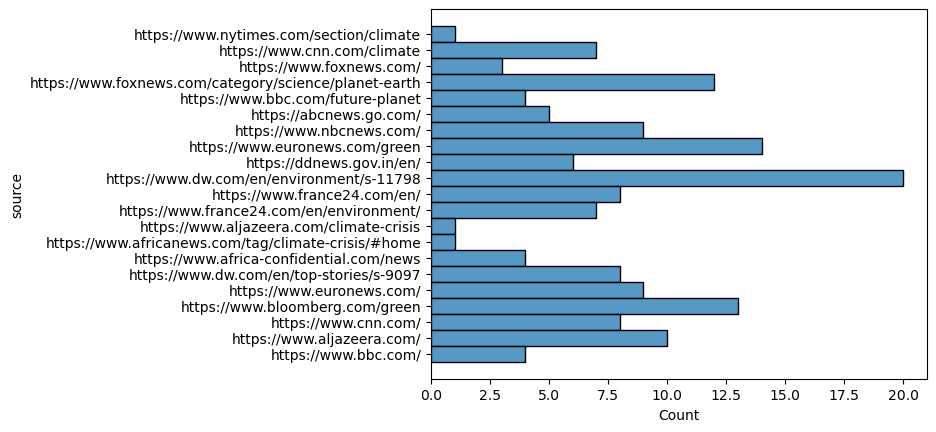

In [55]:
sb.histplot(data=climate_news,y='source')

### 2.2 January 9th

In [6]:
''' UNIQUE HEADLINES ON THE SIXTH '''

unique_headlines = headlines_ninth.drop_duplicates(subset=['source','headline clean'])

In [7]:
unique_headlines.to_excel("Unique Headlines - January 9th.xlsx")

In [9]:
print (f"The total headlines collected on January ninth were: {len(headlines_ninth)}")
print (f"The total unique headlines by news page collected on January ninth were: {len(unique_headlines)}")

print ("\n")
print (f"The proportion of unique headlines collected are {round(len(unique_headlines)/len(headlines_ninth),4)}")

The total headlines collected on January ninth were: 153603
The total unique headlines by news page collected on January ninth were: 7485


The proportion of unique headlines collected are 0.0487


In [10]:
unique_headlines.head()

,source,tag,headlines,headline clean
0,https://www.nytimes.com/,p,"<p class=""css-1c3h0ps""><span class=""css-bfgwbe...","<span class=""css-bfgwbe"">LIVE</span>"
1,https://www.nytimes.com/,p,"<p class=""indicate-hover css-mqqhto"">L.A. Fire...",L.A. Fires
2,https://www.nytimes.com/,p,"<p class=""indicate-hover css-mqqhto"">Carter Fu...",Carter Funeral
3,https://www.nytimes.com/,p,"<p class=""story-wrapper indicate-hover css-1yc...",<span>L.A. Braces for More Destruction as Fire...
4,https://www.nytimes.com/,p,"<p class=""css-ae0yjg""><span class=""css-12tlih8...","<span class=""css-12tlih8"">LIVE</span>"


In [11]:
unique_headlines.reset_index(inplace=True)

In [12]:
climate_mask = []

for post in range(0,len(unique_headlines)):
    current_post = unique_headlines.at[post,'headline clean']
    
    match_result = climate_finder(current_post)
    climate_mask.append(match_result)

In [13]:
climate_news = frame_filter(unique_headlines)

In [14]:
len(climate_news)

131

In [15]:
climate_news.to_excel("Climate Headlines - January 9th.xlsx")

<Axes: xlabel='Count', ylabel='source'>

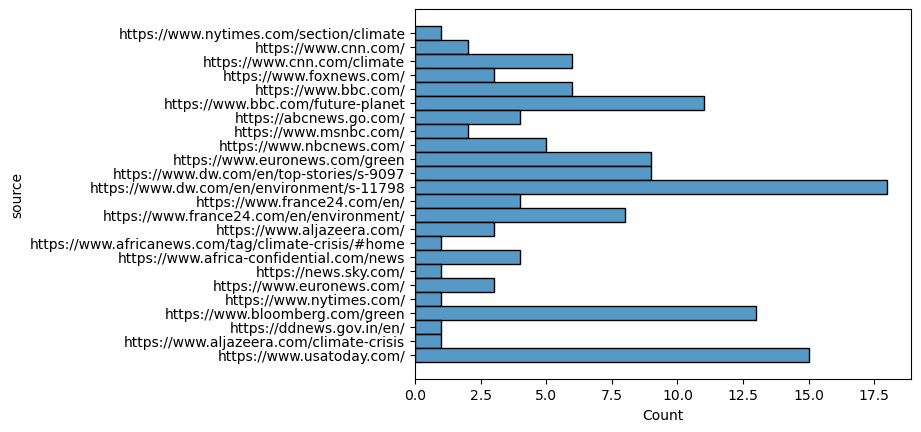

In [16]:
sb.histplot(data=climate_news,y='source')

### 2.3 January 20th

In [7]:
''' UNIQUE HEADLINES ON THE 20TH '''

unique_headlines = headlines_twenty.drop_duplicates(subset=['source','headline clean'])

In [8]:
unique_headlines.to_csv("Unique Headlines - January 20th.csv")

In [9]:
print (f"The total headlines collected on January 20th were: {len(headlines_twenty)}")
print (f"The total unique headlines by news page collected on January sixth were: {len(unique_headlines)}")

print ("\n")
print (f"The proportion of unique headlines collected are {round(len(unique_headlines)/len(headlines_twenty),4)}")

The total headlines collected on January 20th were: 159582
The total unique headlines by news page collected on January sixth were: 7785


The proportion of unique headlines collected are 0.0488


In [10]:
unique_headlines.head(20)

,source,tag,headlines,headline clean
0,https://www.nytimes.com/,p,"<p class=""css-1c3h0ps""><span class=""css-bfgwbe...","<span class=""css-bfgwbe"">LIVE</span>"
1,https://www.nytimes.com/,p,"<p class=""indicate-hover css-mqqhto"">Gaza Ceas...",Gaza Cease-Fire
2,https://www.nytimes.com/,p,"<p class=""indicate-hover css-mqqhto"">Trump Ina...",Trump Inauguration
3,https://www.nytimes.com/,p,"<p class=""indicate-hover css-mqqhto"">Trump’s E...",Trump’s Executive Orders
4,https://www.nytimes.com/,p,"<p class=""story-wrapper indicate-hover css-1yc...","<span>Trump to Be Sworn In, Capping Political ..."
5,https://www.nytimes.com/,p,"<p class=""css-ae0yjg""><span class=""css-12tlih8...","<span class=""css-12tlih8"">LIVE</span>"
6,https://www.nytimes.com/,p,"<p class=""indicate-hover css-1rxo31z"">Return t...",Return to Power After Felony Conviction; Cerem...
7,https://www.nytimes.com/,p,"<p class=""css-1ue6mod"" data-id=""TGVnYWN5Q29sbG...","Watching inside Capital One Arena, the crowd b..."
8,https://www.nytimes.com/,p,"<p class=""css-1ue6mod"" data-id=""TGVnYWN5Q29sbG...",Plenty of tech billionaires are expected to be...
9,https://www.nytimes.com/,p,"<p class=""css-1ue6mod"" data-id=""TGVnYWN5Q29sbG...",Some Jan. 6 rioters are expected to be in Wash...


In [11]:
unique_headlines.reset_index(inplace=True)

In [12]:
climate_mask = []

for post in range(0,len(unique_headlines)):
    current_post = unique_headlines.at[post,'headline clean']
    
    match_result = climate_finder(current_post)
    climate_mask.append(match_result)

In [13]:
climate_news = frame_filter(unique_headlines)

In [15]:
climate_news.head()

,source,tag,headlines,headline clean
0,https://www.nytimes.com/,p,"<p class=""summary-class css-5u9q1p"">Donald Tru...",Donald Trump’s fossil fuels agenda and what it...
1,https://www.nytimes.com/section/climate,a,"<a class=""css-1326lay e5h2ety0"" href=""https://...","<i class=""css-1qtg4z6""></i><span aria-hidden=""..."
2,https://www.cnn.com/climate,span,"<span class=""container__headline-text"" data-ed...",LA fires were larger and more intense because ...
3,https://www.cnn.com/climate,span,"<span class=""container__headline-text"" data-ed...",The ‘world’s largest’ vacuum to suck climate p...
4,https://www.cnn.com/climate,span,"<span class=""container__headline-text"" data-ed...",Can this ocean-based carbon plant help save th...


In [16]:
len(climate_news)

133

In [17]:
climate_news.to_csv("Climate Headlines - January 20th.csv")

<Axes: xlabel='Count', ylabel='source'>

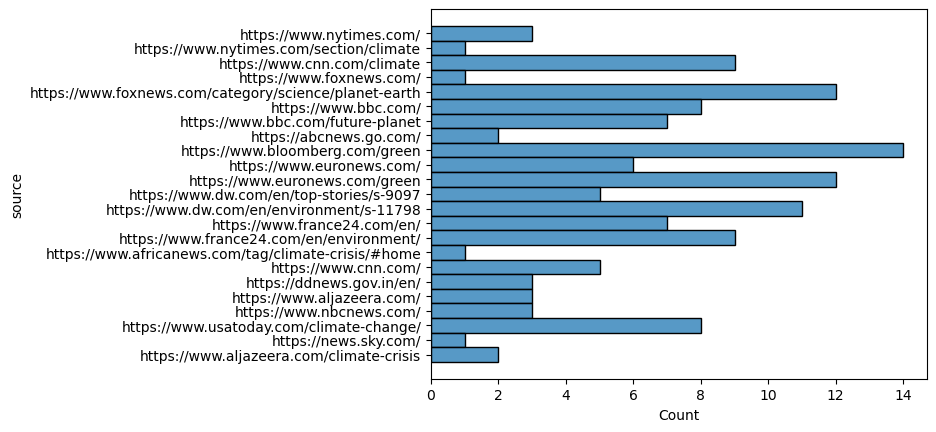

In [18]:
sb.histplot(data=climate_news,y='source')